<a href="https://colab.research.google.com/github/ZacharyFry1/Capstone_Project_UFOs/blob/main/Captstone_Zack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - UFOs in New Mexico

## Problem Definition

The objective of my group's capstone project was to analyze UFO data from New Mexico and determine if there were any trends to when the sightings occurred, what common shapes were reported, where the sightings were reported, and how the data compared to other UFO data sets. My portion of the project was analyzing and visualizing the shape data along with the geographic data. We did not develop a predictive model for this project. By examining the counts reported for each shape in my data sets, I was able to determine common trends in shape data, and by making heat maps and geographical maps, I was able to determine trends in the geographical data.

## Imports/ Data Collection

Importing pandas, numpy, and geopandas among other things.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap
import plotly.graph_objects as go

Required to install for the geopandas specifically.

In [2]:
!pip install folium
!pip install geopandas

Data set for our UFO data from NUFORC. These are all New Mexico sightings. I was the one who manually enetered the latitude and longitude data for the sightings. This data was not native when it was pulled from the NUFORC website. I used google maps to get the latitude and longitude data.

In [3]:
NM_UFO_DF_ORIGINAL = pd.read_csv('https://raw.githubusercontent.com/ZacharyFry1/Capstone_Project_UFOs/main/NM_UFO_DATA_ALL_LAT_LON_ADDED.csv',  on_bad_lines='skip', encoding='latin-1')

Data set from Enigma. This is specifically from a formal email query I submitted to one of their data scientists. This data set does not have latitudes and longitudes. I am only concerned with the shape data.

In [4]:
ENIGMA_UFO_ORIGINAL = pd.read_csv('https://github.com/ZacharyFry1/Capstone_Project_UFOs/raw/main/Enigma_NM_Data_Cleaned.csv', encoding='latin-1')

In [5]:
ENIGMA_UFO_ORIGINAL

,Shape,1940-1950 (Count),1950-1960 (Count),1960-1970 (Count),1970-1980 (Count),1980-1990 (Count),1990-2000 (Count),2000- Present (Count),Count By Shape
0,Cone,2.0,1.0,0.0,0.0,1.0,1.0,14.0,19.0
1,Changing,1.0,1.0,0.0,2.0,2.0,7.0,87.0,100.0
2,Chevron,1.0,0.0,0.0,1.0,1.0,1.0,12.0,16.0
3,Cigar,3.0,2.0,3.0,3.0,6.0,6.0,49.0,72.0
4,Circle,71.0,66.0,21.0,22.0,9.0,24.0,246.0,459.0
...,...,...,...,...,...,...,...,...,...
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
NM_UFO_DF_ORIGINAL.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation,Latitude,Longitude
0,Open,9/19/2016 18:22,Cloverdale,NM,USA,Disk,Two saucer shaped clear images at 31 26 14N 10...,9/19/2016,NaN,NaN,31.415807,-108.915531
1,Open,3/19/1991 2:00,"Chihuahua Mts (north of, mexican border)",NM,USA,Light,I was conducting survielance for the military ...,10/30/1998,NaN,NaN,31.427695,-108.791149
2,Open,11/26/2023 14:30,Columbus,NM,USA,Oval,Blimp or hot air balloon like object just belo...,11/27/2023,NaN,NaN,31.827448,-107.638108
3,Open,12/2/2013 20:06,Columbus,NM,USA,Other,Nine small balls of light with tails in arrow ...,12/2/2013,NaN,NaN,31.827448,-107.638108
4,Open,6/17/2016 21:10,Rodeo,NM,USA,Light,"Extremely bright, continuoulsy luminous, objec...",6/18/2016,NaN,NaN,31.835878,-109.030477


## Data Cleaning

In [7]:
NM_UFO_DF_CLEAN = NM_UFO_DF_ORIGINAL.copy()

Dropping the link, media and explanation column because they don't provide useful information for my analysis.

In [8]:
NM_UFO_DF_CLEAN = NM_UFO_DF_ORIGINAL.drop(['Link', 'Media', 'Explanation'], axis = 1)

Dropping the values in the latitude column that are null because it will confuse geopandas if there are null values.

In [9]:
NM_UFO_DF_CLEAN.dropna(subset=['Latitude'], inplace=True)
NM_UFO_DF_CLEAN.shape

(1703, 9)

In [10]:
NM_UFO_DF_CLEAN['Longitude'].isnull().sum()

0

In [11]:
ENIGMA_UFO_ORIGINAL = ENIGMA_UFO_ORIGINAL.dropna()

When I read in the excel file there were around 40 rows that had nothing in them, so I needed to drop those first and then drop the last row which just had the total counts for each one of the shapes across each decade.

In [12]:
ENIGMA_UFO_ORIGINAL.drop(23, axis = 0, inplace = True)

<ipython-input-12-c65a7c78ef60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENIGMA_UFO_ORIGINAL.drop(23, axis = 0, inplace = True)


Replacing the triangle with Triangle because I had two different triangle shapes on my graph below.

In [13]:
NM_UFO_DF_CLEAN['Shape'] = NM_UFO_DF_CLEAN['Shape'].str.replace('triangle', 'Triangle')

## Exploratory Data Analysis

### Map of Sightings

Converting the latitude to numeric. For some reason the longitude was already a float but the latitude was not. In order for geopandas to properly map the latitude and longitude, it needs numbers, not strings.

In [14]:
NM_UFO_DF_CLEAN['Latitude'] = pd.to_numeric(NM_UFO_DF_CLEAN['Latitude'], errors='coerce')

In [15]:
NM_UFO_DF_CLEAN['Latitude'].dtype

dtype('float64')

After the latitude and longitude were made into numbers I used the folium module to create a sightings map of our latitudes and longitudes. I used the "Latitude" column for the latitude and the "Longitude" column for the longitude. I then centered the map on New Mexico so it was easier to navigate and visualize the data.

In [16]:
fig = px.scatter_mapbox(NM_UFO_DF_CLEAN, lat="Latitude", lon="Longitude")
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(visible=False, resolution=50, scope="usa",
                    showcountries=True, countrycolor="Black",
                    showsubunits=True, subunitcolor="Red")
fig.update_layout(
    geo_scope='usa',
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=34.5199, lon=-105.8701),  # Center on New Mexico
        zoom=5
    )
)
fig.show()

### Heat Map of Sightings

In the code cells below I use geopandas to create a heat map of my latitude and longitude sightings. First I create a geo dataframe, then using that geo dataframe I plot it on a heatmap.

In [17]:
NM_UFO_gdf = gpd.GeoDataFrame(NM_UFO_DF_CLEAN,
                             geometry=gpd.points_from_xy(NM_UFO_DF_CLEAN.Longitude,
                                                        NM_UFO_DF_CLEAN.Latitude))

In [18]:

m = folium.Map(location=[34.5199, -105.8701], zoom_start=6)  # Centered on NM

# Drop rows with NaN values in 'Latitude' or 'Longitude' before creating the heatmap
NM_UFO_gdf_clean = NM_UFO_gdf.dropna(subset=['Latitude', 'Longitude'])


HeatMap(data=NM_UFO_gdf_clean[['Latitude', 'Longitude']].values,
        radius=10, blur=15).add_to(m)


m

### Animation

Below is an animation I created based on the year a sighting occured using my "Occured" column. The Occured column was already in an easily convertible date time format. Before I could plot the animation I changed the column to datetime, then changed it to sort by the year.

In [19]:
NM_UFO_DF_CLEAN['Occurred'] = pd.to_datetime(NM_UFO_DF_CLEAN['Occurred'])

In [20]:
NM_UFO_DF_CLEAN['Year'] = NM_UFO_DF_CLEAN['Occurred'].dt.year

Using plotly express I created the animation using the code below. First I sorted by the year so it displayed the sightings from the earliest year to the latest year. I used my latitude and longitude columns for the lat and long. The hover name was occurred because thats what I wanted to display in the animation. The frame was based on the Year column and finally I centered the animation on New Mexico.

In [21]:
NM_UFO_DF_CLEAN = NM_UFO_DF_CLEAN.sort_values(by=['Occurred'])  # Sort by 'Occurred'


fig = px.scatter_mapbox(
    NM_UFO_DF_CLEAN,
    lat="Latitude",
    lon="Longitude",
    animation_frame="Year",  # Animate by year
    hover_name="Occurred",  # Show 'Occurred' on hover
    color_discrete_sequence=["red"],
    zoom=6,
    mapbox_style="open-street-map"
)

fig.update_layout(
    title="UFO Sightings in New Mexico Over Time",
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(lat=34.5199, lon=-105.8701),  # Centered on New Mexico
        zoom=5.25  # Adjusted zoom to focus on New Mexico
    )
)

fig.show()

In [22]:
fig.write_html(file="map.html")

## Data Processing

### NUFORC Shape Data

24 different shapes.

In [23]:
NM_UFO_DF_CLEAN[['Shape']].nunique()

,0
Shape,24


In [24]:
shape_data = NM_UFO_DF_CLEAN[['Shape']]

In [25]:
shape_data.isnull().sum()

,0
Shape,70


In [26]:
shape_data = shape_data.dropna()

In [27]:
shape_data.isnull().sum()

,0
Shape,0


NUFORC shape data.

In the code below I display the shape counts from our data set  from NUFORC.

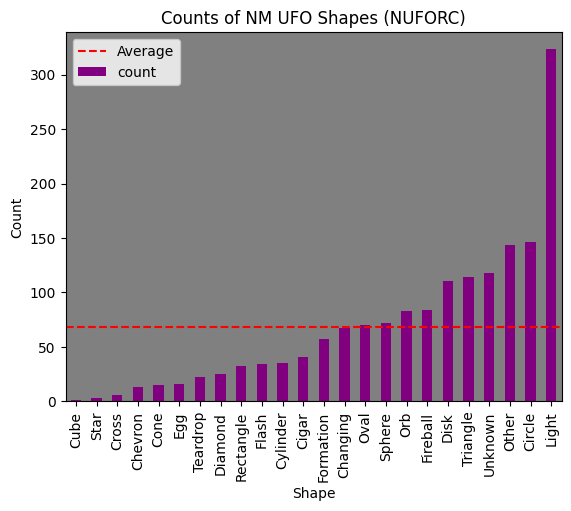

In [28]:
shape_counts = shape_data['Shape'].value_counts()
shape_counts = shape_counts.sort_values(ascending = True)
shape_counts.plot(kind='bar', color = 'purple')
average_count = shape_counts.mean()
plt.axhline(y=average_count, color='red', linestyle='--', label='Average')
plt.xlabel("Shape")
plt.ylabel("Count")
plt.title("Counts of NM UFO Shapes (NUFORC)")
plt.legend()
plt.gca().set_facecolor('gray')
plt.show()

Light is by far the most common shape. Circle and other are next.

### NUFORC Shape Data Over Time

Graph showing the distrobutions of shapes over time. I had to group by the year and shape, then perform a count on the shapes. X is the year and y is the Count of the shape.

In [31]:
shape_time_data = NM_UFO_DF_CLEAN.groupby(['Year', 'Shape'])['Shape'].count().reset_index(name='Count')

In [33]:
fig = px.line(shape_time_data,
              x="Year",
              y="Count",
              color="Shape",
              title="UFO Shape Trends Over Time")
fig.show()

### Enigma Shape Data

This data set is from a different website than the one we were working with. I got this data through a formal query and converted the information into an excel file which I read in at the start of this notebook.

In [ ]:
ENIGMA_UFO_ORIGINAL

,Shape,1940-1950 (Count),1950-1960 (Count),1960-1970 (Count),1970-1980 (Count),1980-1990 (Count),1990-2000 (Count),2000- Present (Count),Count By Shape
0,Cone,2.0,1.0,0.0,0.0,1.0,1.0,14.0,19.0
1,Changing,1.0,1.0,0.0,2.0,2.0,7.0,87.0,100.0
2,Chevron,1.0,0.0,0.0,1.0,1.0,1.0,12.0,16.0
3,Cigar,3.0,2.0,3.0,3.0,6.0,6.0,49.0,72.0
4,Circle,71.0,66.0,21.0,22.0,9.0,24.0,246.0,459.0
5,Cross,0.0,0.0,0.0,0.0,1.0,1.0,5.0,7.0
6,Cube,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,Cylinder,2.0,4.0,2.0,0.0,3.0,3.0,37.0,51.0
8,Diamond,2.0,0.0,1.0,1.0,2.0,34.0,32.0,72.0
9,Disk,48.0,34.0,22.0,16.0,7.0,1.0,121.0,249.0


Performing a value counts on the shapes and getting the mean count for the plot below.

In [ ]:
ENIGMA_UFO_ORIGINAL = ENIGMA_UFO_ORIGINAL.sort_values(by=['Count By Shape'])
average_count = ENIGMA_UFO_ORIGINAL['Count By Shape'].mean()

Enigma Shape Data

Below is code for the Enigma shape data I retrieved from a formal query.

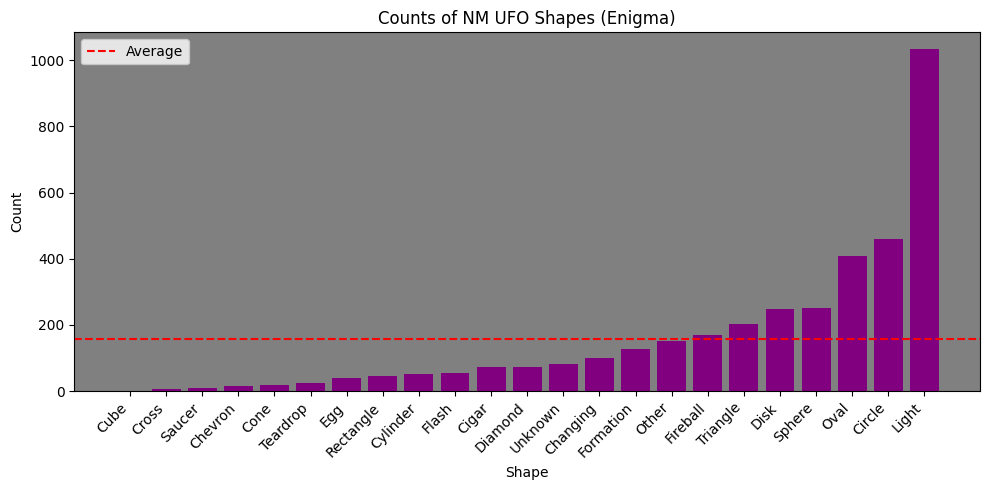

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(ENIGMA_UFO_ORIGINAL['Shape'], ENIGMA_UFO_ORIGINAL['Count By Shape'], color='purple')
plt.axhline(y=average_count, color='red', linestyle='--', label='Average')
plt.xlabel("Shape")
plt.ylabel("Count")
plt.title("Counts of NM UFO Shapes (Enigma)")
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor('gray')
plt.tight_layout()
plt.legend()
plt.show()

## Conclusions


Based on my analysis there are several conclusions I can draw from the data. The geospatial data clearly shows that big hotspots for UFO sightings are centered in and around major population centers such as Albuquerque, Santa Fe and Las Cruces. This makes sense because more people live in these areas than in rural parts of the state and they are more likely to see and report UFOs to NUFORC. There were also numerous sightings at military bases such as Holloman AFB and White Sands Missile test range. In the future I would like to overlay the latitudes and longitudes of military bases and see if there is a correlation between the UFO sightings and military installations. When comparing the shape data from NUFORC and Enigma some general trends pop out. The first is that the most commonly reported shapes were lights and circles. This is interesting because it suggests people across different areas are seeing the same things. Lights were by far the most commonly reported shape in both data sets. This might be because when an airborne object is viewed from a great distance there is no discernible shape and all the observer can make out is lights. In addition to this it is important to note that the bulk of the sightings were reported between 2000-2024, greatly biasing the data. In a deeper analysis in the future it would be interesting to see what shapes were commonly reported over time.